In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline

In [ ]:
lungs_df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lung-volume.csv')

##For each group, is there a significant difference between time 1 and time 2?

In [ ]:
lungs_df.head(30)

,group,patient,t1,t2
0,1,1-1,4226,4497
1,1,1-2,5731,5665
2,1,1-3,3912,4505
3,1,1-4,4811,6472
4,1,1-5,5128,4710
5,1,1-6,3669,3116
6,1,1-7,4807,3692
7,1,1-8,7031,6683
8,1,1-9,4136,4442
9,1,1-10,5059,5119


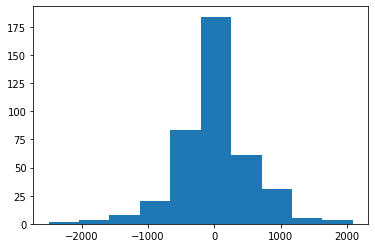

In [ ]:
# Checking for normality of differences
plt.hist(lungs_df['t1'] - lungs_df['t2'])
plt.show()

In [ ]:
group_1 = lungs_df[(lungs_df['group'] == 1)]
group_2 = lungs_df[(lungs_df['group'] == 2)]
group_3 = lungs_df[(lungs_df['group'] == 3)]

In [ ]:
group_1_diff = (group_1['t2'] - group_1['t1'])
group_2_diff = (group_2['t2'] - group_2['t1'])
group_3_diff = (group_3['t2'] - group_3['t1'])

In [ ]:
print(stats.describe(group_1_diff))
print(stats.describe(group_2_diff))
print(stats.describe(group_3_diff))

DescribeResult(nobs=200, minmax=(-2087, 2498), mean=14.07, variance=390848.356884422, skewness=0.5059669289277815, kurtosis=2.6330469885600785)
DescribeResult(nobs=100, minmax=(-1304, 1905), mean=-18.0, variance=302161.0707070707, skewness=0.3237019462539288, kurtosis=1.0006404124552226)
DescribeResult(nobs=100, minmax=(-1827, 1083), mean=-36.71, variance=166937.74333333332, skewness=-0.6776063369926263, kurtosis=3.355434798893132)


Of the three groups, only group two passes the test for normality of differences. We'll run the paired t-tests on them anyway, just for practice.

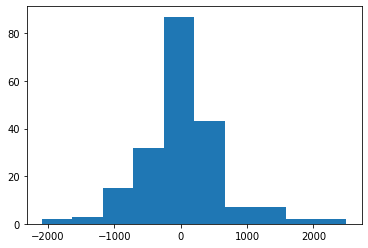

In [ ]:
plt.hist(group_1_diff)
plt.show()

In [ ]:
print(stats.ttest_rel(group_1['t1'], group_1['t2']))
print(stats.ttest_rel(group_2['t1'], group_2['t2']))
print(stats.ttest_rel(group_3['t1'], group_3['t2']))

Ttest_relResult(statistic=-0.31827677584963787, pvalue=0.7506087664956842)
Ttest_relResult(statistic=0.32745622415118286, pvalue=0.7440142766032991)
Ttest_relResult(statistic=0.8984773127301627, pvalue=0.37111115842334486)


Based on the t-statistics and pvalues for each of the groups, we cannot reject the null hypothesis for any of them.  

##Is there a significant difference in the mean of all groups at time 2?

In [ ]:
print(stats.shapiro(group_1['t2']))
print(stats.shapiro(group_2['t2']))
print(stats.shapiro(group_3['t2']))

(0.9955824613571167, 0.8313238024711609)
(0.9911357164382935, 0.7556766271591187)
(0.9781965613365173, 0.09609080106019974)


In [ ]:
print(np.std(group_1['t2']))
print(np.std(group_2['t2']))
print(np.std(group_3['t2']))

1007.0247633375255
1097.2471918396511
973.6588566330614


Based on the t-statistic, p-value and std of the groups, we can conclude our distribution is normal and variability is similar.

In [ ]:
stats.f_oneway(group_1['t2'], group_2['t2'], group_3['t2'])

F_onewayResult(statistic=67.65846945026495, pvalue=5.1893599904179e-26)

These results show us that there is a difference between at least one of the groups. We'll perform a Tukey test to determine where the difference is. 

In [ ]:
tukey = pairwise_tukeyhsd(endog = lungs_df['t2'],
                          groups = lungs_df['group'],
                          alpha=.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,99.705,0.6902,-195.9612,395.3712,False
1,3,-1341.865,0.001,-1637.5312,-1046.1988,True
2,3,-1441.57,0.001,-1782.9759,-1100.1641,True


We can see that there is a significant difference between groups 1 & 3, and groups 2 & 3, but not between groups 1 & 2.